In [1]:
import pandas as pd
import numpy as np

In [18]:
beer = pd.read_csv(r"https://raw.githubusercontent.com/ua-chjb/beer_and_happiness/refs/heads/main/assets/data/beer_sum.csv")

dem = pd.read_csv(r"https://raw.githubusercontent.com/ua-chjb/beer_and_happiness/refs/heads/main/assets/data/dem_sum.csv")

pop = pd.read_csv(r"https://raw.githubusercontent.com/ua-chjb/beer_and_happiness/refs/heads/main/assets/data/pop_sum.csv")

In [19]:
beer = beer.rename(columns={"Unnamed: 0": "Country"})
beer = beer.set_index("Country")
beer.columns = np.arange(2008, 2019)
beer[:5]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Afghanistan,0.00857,0.00972,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Albania,2.12835,2.20543,1.71,1.88,1.34,1.34,1.29,1.48,1.52,1.64,1.75
Algeria,0.20481,0.19895,0.18,0.21,0.23,0.26,0.28,0.31,0.32,0.30,0.31
Angola,3.26552,3.95114,4.23,4.43,4.59,4.46,4.50,3.25,3.39,3.65,3.78
Argentina,3.16000,3.23000,3.32,3.50,3.29,3.35,3.37,3.39,3.62,3.62,3.62


In [20]:
dem = dem.rename(columns={"Unnamed: 0": "Country"})
dem = dem.set_index("Country")
dem.columns = np.arange(2008, 2019)
dem[:5]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Afghanistan,-1.929690,-2.044093,-1.991810,-1.919018,-1.842996,-1.879709,-1.773257,-1.844364,-1.855426,-1.886566,NaN
Albania,NaN,0.048114,-0.033831,-0.110023,-0.060784,0.070411,0.314873,0.251629,0.257292,0.299945,NaN
Algeria,NaN,NaN,-1.140853,-1.182341,-1.115535,NaN,-1.002867,NaN,-0.976652,-0.927691,NaN
Angola,NaN,NaN,NaN,-0.747358,-0.732785,-0.752538,-0.739363,NaN,NaN,NaN,NaN
Argentina,0.136837,0.023821,0.138446,0.251968,0.199125,0.171151,0.170099,0.213269,0.348582,0.351304,NaN


In [21]:
pop = pop.rename(columns={"Unnamed: 0": "Country"})
pop = pop.set_index("Country")
pop.columns = np.arange(2008, 2019)
pop[:5]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Afghanistan,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0
Albania,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
Algeria,34569592.0,35196037.0,35856344.0,36543541.0,37260563.0,38000626.0,38760168.0,39543154.0,40339329.0,41136546.0,41927007.0
Angola,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0
Argentina,40273769.0,40684338.0,40788453.0,41261490.0,41733271.0,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0


In [97]:
paper_bgcolor="white"
plot_bgcolor="white"
font_color="black"
legend_color="white"

def layout_func(fig):
    
    fig.update_layout(
        dict(
            paper_bgcolor=paper_bgcolor,
            plot_bgcolor=plot_bgcolor,
            font={"color": font_color},
            clickmode="select",
            legend={"bgcolor":legend_color,
                    "font": {"color":font_color},
                    "title":{"font":{"color":font_color}},
                    },
            # title=dict(
                # font={"size": 28.5, "color": font_color},
                # ),
            # xaxis=dict(
                # showgrid=False,
                # zeroline=False
            # ),
            # yaxis=dict(
                # showgrid=False,
                # zeroline=False
            # )
        )
    )

    return fig

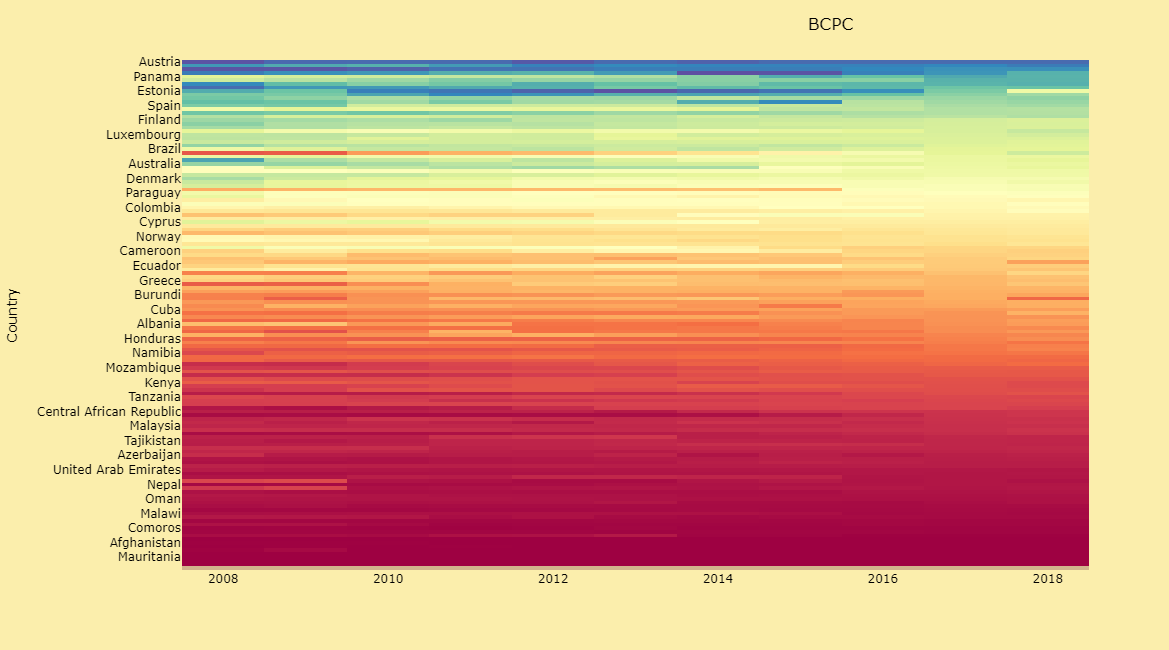

In [68]:
import plotly.express as px
import plotly.graph_objs as go

# static

def fig_A_heatmap():
    return px.imshow(beer.sort_values(by=2017, ascending=False), color_continuous_scale="Spectral", text_auto=False).update_coloraxes(showscale=False).update_xaxes(scaleanchor="x", scaleratio=1).update_layout({
        "height":650, "width": 200, "title": {"text": "BCPC", "x":0.73}})
layout_func(fig_A_heatmap())

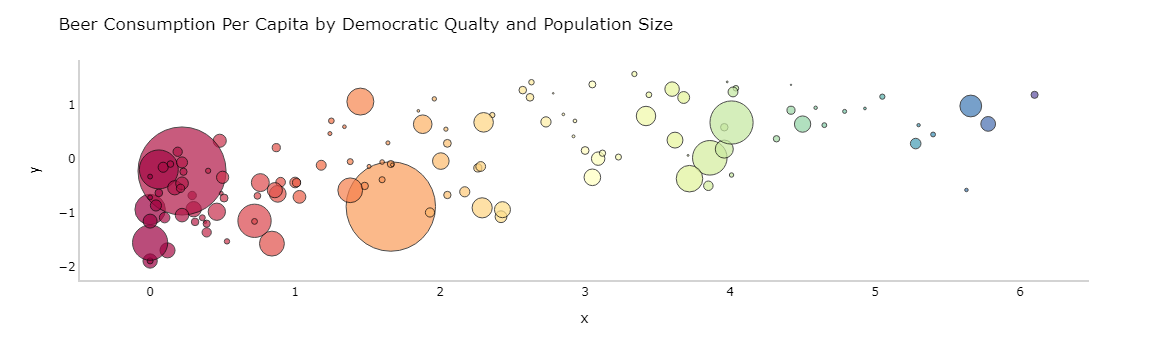

In [114]:
from itertools import *

# static

def fig_B_bubblechart(year):
    x = beer[2017]
    y = dem[2017]
    z = pop[2017] 

    colors = list(islice(cycle(iter(px.colors.diverging.Spectral)), len(beer)))
    
    return px.scatter(x=x, y=y, size=z, color=x, hover_name=x.index, color_continuous_scale="Spectral").update_traces({"marker": {"size": z*10, "line": {"width": 1, "color":"black"}}}).update_layout({
        "title": "Beer Consumption Per Capita by Democratic Qualty and Population Size",
        "xaxis": {"title": "Beer Consumption Per Capita"},
        "yaxis": {"title": "Democratic Quality"},
        "coloraxis_showscale": False,
        "xaxis": {"mirror": False, "showline": True, "linecolor": "lightgrey", "linewidth": 2},
        "yaxis": {"mirror": False, "showline": True, "linecolor": "lightgrey", "linewidth": 2},
        
    })
    # .update_layout(coloraxis_showscale=False)

# mirror=True,
# ticks='outside',
# showline=True,

layout_func(fig_B_bubblechart(2013))

In [25]:
def wrangle_year_difference(df, year1, year2):
    dem_dash = df.T.reset_index().rename(columns={"index": "Year"})
    mask_gt = ( dem_dash["Year"] >= year1 )
    mask_lt = ( dem_dash["Year"] <= year2)
    
    dem_dash = dem_dash[mask_gt & mask_lt].set_index("Year")
    dem_dash.loc[-1] = dem_dash.mean(axis=0)
    return pd.DataFrame(dem_dash.loc[-1])

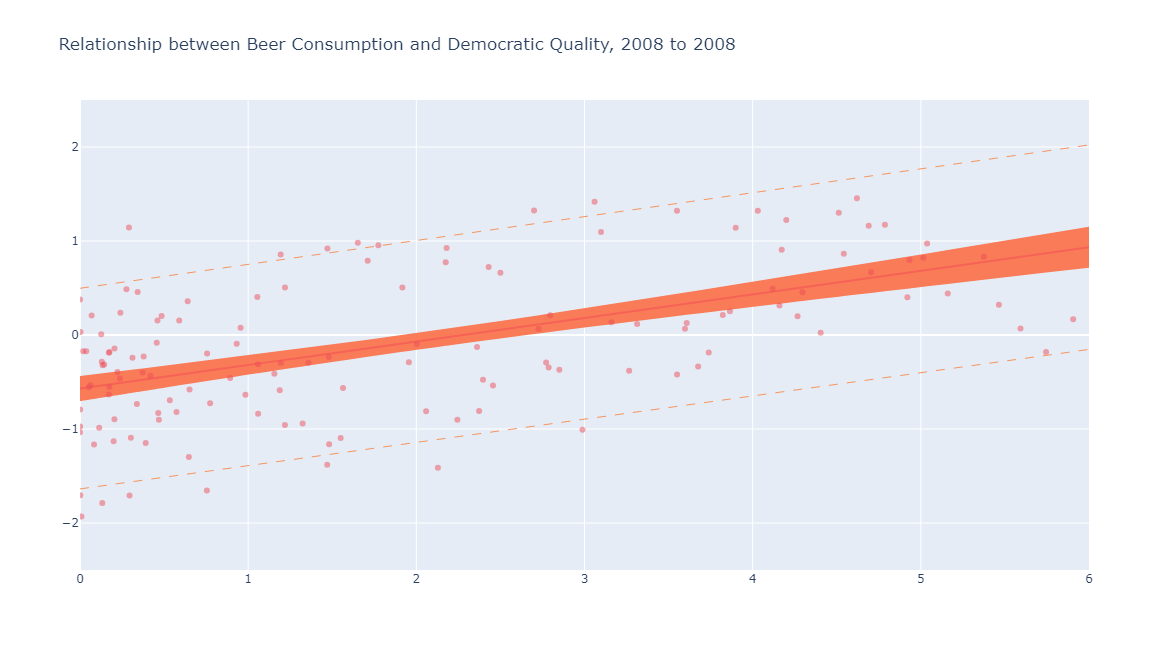

In [80]:
from sklearn.linear_model import LinearRegression
from scipy import stats

def fig_C_scatter(df1, df2, year1, year2, size=None, conf=0.95, colors=px.colors.diverging.Temps, opacity=0.5, title=None):


    x = pd.Series(wrangle_year_difference(beer, year1, year2).values.flatten(), index=df1.index)
    y = pd.Series(wrangle_year_difference(dem, year1, year2).values.flatten(), index=df2.index)

    # x = df1[year]
    # y = df2[year]
    
    x_vals = x.interpolate()
    y_vals = y.interpolate()

        
    # sort x and y
    list_of_tuples = [(a,b) for a,b in zip(x_vals, y_vals)]
    list_of_sorted_tuples = sorted(list_of_tuples, key=lambda j: j[0])
    x_arr = np.asarray([a[0] for a in list_of_sorted_tuples])
    y_arr = np.asarray([b[1] for b in list_of_sorted_tuples])

    # linear regression model
    model = LinearRegression()
    model.fit(x_arr.reshape(-1, 1), y_arr)
    y_hat = model.predict(x_arr.reshape(-1, 1))

    # figures needed for inferential statistics
    n = x_arr.size
    m = len(x_arr.shape)
    dof = n - m
    t = stats.t.ppf(conf, dof)

    resid = y_arr - y_hat
    se = np.sqrt(np.sum(resid**2) / dof)

    ci = t * se * np.sqrt(1/n + (x_arr - np.mean(x_arr))**2 / np.sum((x_arr - np.mean(x_arr))**2))
    pi = t * se * np.sqrt(1 + 1/n + (x_arr - np.mean(x_arr))**2 / np.sum((x_arr - np.mean(x_arr))**2))

    pi2 = np.linspace(pi.min(), pi.max(), 100)
    x2 = np.linspace(x_arr.min(), x_arr.max(), 100)
    y_hat2 = np.linspace(y_hat.min(), y_hat.max(), 100)

    # scatterplot with ci // pi bands
    ff = go.Figure()

    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_hat+ci,
            mode="lines",
            line={"color": colors[2], "width": 0},
            name="upper ci band limit",
            showlegend=False
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_hat-ci,
            mode="none",
            line={"color": colors[2], "width": 0},
            name=f"{round(conf * 100)}% confidence interval   ",
            fill="tonexty",
            fillcolor=colors[2]
        )
    )


    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_hat,
            mode="lines",
            line={"color": colors[1]},
            name="linear model",
        )
    )
    
    
    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_arr,
            mode="markers",
            marker={"color": colors[0], "opacity": opacity, "size": size},
            name="students"
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x2,
            y=y_hat2+pi2,
            mode="lines",
            line={"color": colors[3], "width": 1, "dash": "dash"},
            name=f"{round(conf*100)}% prediction interval",
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x2,
            y=y_hat2-pi2,
            mode="lines",
            line={"color": colors[3], "width": 1, "dash": "dash"},
            name="lower pi band limit",
            showlegend=False
        )
    )


    return ff.update_layout({"title": f"Relationship between Beer Consumption and Democratic Quality, {year1} to {year2}",
                           "height": 650,
                            "width": 1500,
                            "xaxis":{"title": "", "range": [0, 6]},
                            "yaxis": {"title": "", "range": [-2.5, +2.5]}},
                           )


year1 = 2008
year2 = 2008


fig = fig_C_scatter(beer, dem, year1, year2, size=None, conf=0.95, colors=px.colors.sequential.Oryel[::-1])
fig.update_layout({"width": 800, "legend": {"visible": False}})

In [36]:
year1 = 2008
year2 = 2018

beer_dash = beer.T.reset_index().rename(columns={"index": "Year"})

mask_gt = ( beer_dash["Year"] >= year1 )
mask_lt = ( beer_dash["Year"] <= year2)
df = beer_dash[[country, "Year"]][mask_gt & mask_lt]

df

Country,Cameroon,Year
0,2.37334,2008
1,2.80216,2009
2,2.58000,2010
3,2.54000,2011
4,2.85000,2012
5,3.02000,2013
6,3.03000,2014
7,2.82000,2015
8,2.43000,2016
9,2.42000,2017


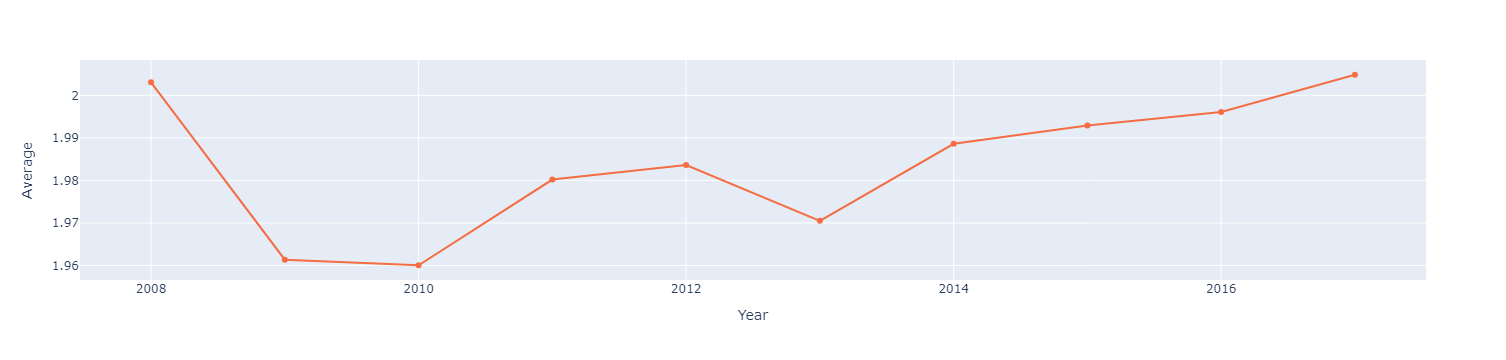

In [27]:
# MULTIPLE YEARS
# COUNTRY

def fig_D_top_line_beer(df, country, year1, year2):

    beer_dash = beer.T.reset_index().rename(columns={"index": "Year"})

    mask_gt = ( beer_dash["Year"] >= year1 )
    mask_lt = ( beer_dash["Year"] <= year2)
    df = beer_dash[[country, "Year"]][mask_gt & mask_lt]
    return px.line(df, x="Year", y=country, markers=True).update_traces(line_color=px.colors.diverging.Spectral[2])

fig_D_top_line_beer(beer, "Average", 2008, 2017)

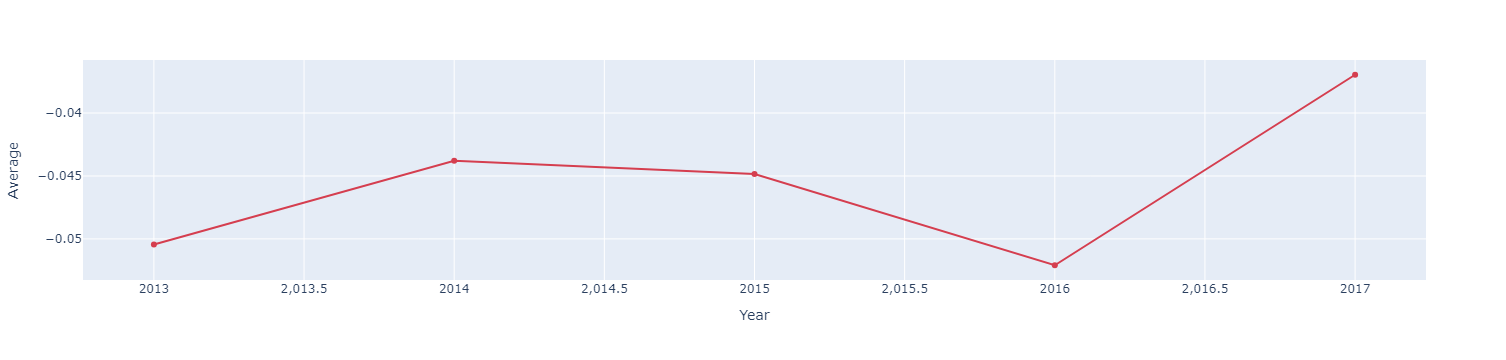

In [28]:
# MULTIPLE YEARS
# COUNTRY

def fig_E_top_line_beer(df, country, year1, year2):

    dem_dash = dem.T.reset_index().rename(columns={"index": "Year"})
    
    mask_gt = ( dem_dash["Year"] >= year1 )
    mask_lt = ( dem_dash["Year"] <= year2)
    df = dem_dash[[country, "Year"]][mask_gt & mask_lt]
    return px.line(df, x="Year", y=country, markers=True).update_traces(line_color=px.colors.diverging.Spectral[1])

fig_E_top_line_beer(dem, "Average", 2013, 2017)

In [39]:
year1 = 2013
year2 = 2018
country="United States"

dem_dash = dem.T.reset_index().rename(columns={"index": "Year"})

mask_gt = ( dem_dash["Year"] >= year1 )
mask_lt = ( dem_dash["Year"] <= year2)
df = dem_dash[[country, "Year"]][mask_gt & mask_lt]
df

Country,United States,Year
5,0.873046,2013
6,0.826821,2014
7,0.893903,2015
8,0.755765,2016
9,0.677056,2017
10,NaN,2018


In [38]:
wrangle_year_difference(beer, 2013, 2018)

,-1
Country,
Afghanistan,0.000000
Albania,1.503333
Algeria,0.296667
Angola,3.838333
Argentina,3.495000
...,...
Uruguay,1.925000
Uzbekistan,0.198333
Zambia,1.120000


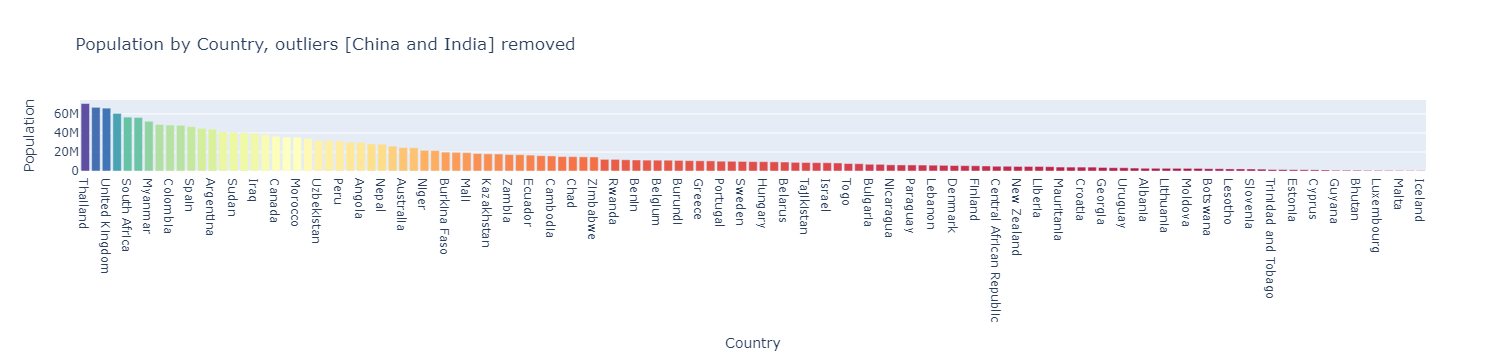

In [29]:
def IQR(series):
    x = series
    mask = ((x >= x.quantile(0.25) - 1.5*(x.quantile(0.75)-x.quantile(0.25))) & (x <= x.quantile(0.75) + 1.5*(x.quantile(0.75)-x.quantile(0.25))))
    return mask

# static

def fig_F_popbar():

    pop_dash = pop.T.reset_index().rename(columns={"index": "Year"})
    mask = ( pop_dash["Year"]==2017 )
    pop_dash = pop_dash[mask].drop(["Year"], axis=1).T.rename(columns={9:"pop"}).sort_values(by=["pop"], ascending=False)    

    mask = IQR(pop_dash["pop"])

    return go.Figure(go.Bar(y=pop_dash[mask]["pop"], x=pop_dash[mask].index, marker={"color": pop_dash[mask]["pop"], "colorscale": "Spectral"})).update_layout({
        "title": "Population by Country, outliers [China and India] removed",
        "xaxis": {"title": "Country"},
        "yaxis": {"title": "Population"},
    })

fig_F_popbar()